## Introduction 

In this notebook we are going to look at trigger bits and passing/failing data.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import h5py
import yaml
import pickle 
import mplhep as hep
import awkward as ak
import sklearn.metrics as metrics

plt.rcParams['figure.dpi'] = 100

/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-pac

In [2]:
filename = "/uscms/home/jpearkes/eos/forAda/scouting_nano.root" # originally from root://hip-cms-se.csc.fi//store/user/pinkaew/scouting_nano_prod_golden/ScoutingPFRun3/crab_ScoutingPFRun3_Run2024D-v1_380385-380470_Golden/240517_205837/0000/scouting_nano_399.root
file = uproot.open(filename)

In [3]:
events = file["Events"]

In [8]:
events["ScoutingJet_pt"].array()

<Array [[], [26.7], ..., [23.4, 23.4, 21.3]] type='431555 * var * float32'>

In [4]:
# events.keys()

In [5]:
# Print out stored L1 trigger names -> L1* are the physics objects, L1_* are the trigger bits
"""
for branch in events.keys():
    if "L1_" in branch:
        print(branch)
"""

# Can also do this with dictionary filters: <events.keys(filter_name = "L1_*")>

'\nfor branch in events.keys():\n    if "L1_" in branch:\n        print(branch)\n'

In [5]:
# Print out Scouting paths -> same pattern as above
for branch in events.keys():
    if "DST_" in branch:
        print(branch)

DST_PFScouting_DoubleMuon
DST_PFScouting_DoubleEG
DST_PFScouting_JetHT
DST_PFScouting_DatasetMuon
DST_PFScouting_AXONominal
DST_PFScouting_AXOTight
DST_PFScouting_SingleMuon


In [6]:
# Print out HLT paths 
"""
for branch in events.keys():
    if "HLT_" in branch:
        print(branch)
"""

'\nfor branch in events.keys():\n    if "HLT_" in branch:\n        print(branch)\n'

In [4]:
# Check how many events are in file
total_number_of_events = len(events["event"].array())
total_number_of_events

431555

In [6]:
# Look at the JetHT trigger bits 
# Trigger bit = Binary bit, 1 = Accepted event, 0 = Rejected event. Represented as boolean arrays, so True=1=Accepted and False=0=Rejected
trigger_bits = events["DST_PFScouting_JetHT"].array()
trigger_bits

<Array [False, False, False, ..., False, True, False] type='431555 * bool'>

In [7]:
# Calculating the number of events passing an individual trigger
total_passing_trigger = np.sum(trigger_bits) # Converts True to 1 and False to 0 and adds those up
total_passing_trigger # So there were 168638 "True" values in that list!

168638

In [8]:
# Calculate the fraction of events passing the JetHT trigger
total_passing_trigger/total_number_of_events*100.0

39.076826823927426

We can investigate different Scouting and HLT paths here: https://cmshltinfo.app.cern.ch/
- Click on "Path summary" 
- Double click on the path you are interested in 
- Click on "Filters" 
- Select a run in 2024 
- Double click on "hltL1s" 
- On the right: L1SeedsLogicalExpression will show you which level 1 trigger seeds are used for a particular scouting / HLT path --> IE, what boxes were checked such that the event was kept.

E.g. https://cmshltinfo.app.cern.ch/path/DST_PFScouting_AXONominal_v 


# Questions
**What are the names of the L1 trigger bits used in the JetHT scouting trigger?** [Source](https://cmshltinfo.app.cern.ch/path/DST_PFScouting_JetHT_v)

The different seeds from L1SeedsLogicalExpression:
- L1_HTT200er
- L1_HTT255er
- L1_HTT280er
- L1_HTT320er
- L1_HTT360er
- L1_HTT400er
- L1_HTT450er
- L1_ETT2000
- L1_SingleJet180
- L1_SingleJet200
- L1_DoubleJet30er2p5_Mass_Min250_dEta_Max1p5
- L1_DoubleJet30er2p5_Mass_Min300_dEta_Max1p5
- L1_DoubleJet30er2p5_Mass_Min330_dEta_Max1p5

**Do we store those particular L1 trigger bits for each in our file?**

The "DST_PFScouting_JetHT" file just contains a list of booleans describing whether an event was passed or rejected. However, we do have access to each of those bits in our events file; each of them returns another boolean array that we can use to determine which events pass them. However, I was unable to find any corresponding file for the last three seeds.
  
**Out of the L1 trigger bits used in the JetHT scouting trigger, what fraction of all events pass them?**  
- For all events, 0.0% passed L1_HTT200er
- For all events, 0.014598371007171738% passed L1_HTT255er
- For all events, 0.0% passed L1_HTT280er
- For all events, 0.0% passed L1_HTT320er
- For all events, 2.7637265238497988% passed L1_HTT360er
- For all events, 1.7932824321349536% passed L1_HTT400er
- For all events, 0.0% passed L1_HTT450er
- For all events, 0.0% passed L1_ETT2000
- For all events, 0.02896502183962647% passed L1_SingleJet180
- For all events, 0.0887488269166155% passed L1_SingleJet200
  
**Out of the L1 trigger bits used in the JetHT scouting trigger, what fraction of the JetHT triggered events pass them?**
- For JetHT triggered events, 0.0% passed L1_HTT200er
- For JetHT triggered events, 0.03735812806129105% passed L1_HTT255er
- For JetHT triggered events, 0.0% passed L1_HTT280er
- For JetHT triggered events, 0.0% passed L1_HTT320er
- For JetHT triggered events, 7.072545926778069% passed L1_HTT360er
- For JetHT triggered events, 4.5891198899417684% passed L1_HTT400er
- For JetHT triggered events, 0.0% passed L1_HTT450er
- For JetHT triggered events, 0.0% passed L1_ETT2000
- For JetHT triggered events, 0.07412326996287906% passed L1_SingleJet180
- For JetHT triggered events, 0.22711369916626145% passed L1_SingleJet200
  
**Which is highest, which is lowest?**

The number of JetHT triggered events that passed L1_HTT360er is highest, at about 7.07% percent. Any value associated with L1_HTT200/280/320/450er or L1_ETT2000 are lowest at 0.0%, since no events passed these filters.

In [8]:
# For the trigger bits - What fraction of all events pass them?

# Make a dictionary with each L1 trigger bit from the JetJT scouting trigger
JetHT_bits = {
    "L1_HTT200er" : events["L1_HTT200er"].array(),
    "L1_HTT255er" : events["L1_HTT255er"].array(),
    "L1_HTT280er" : events["L1_HTT280er"].array(),
    "L1_HTT320er" : events["L1_HTT320er"].array(),
    "L1_HTT360er" : events["L1_HTT360er"].array(),
    "L1_HTT400er" : events["L1_HTT400er"].array(),
    "L1_HTT450er" : events["L1_HTT450er"].array(),
    "L1_ETT2000" : events["L1_ETT2000"].array(),
    "L1_SingleJet180" : events["L1_SingleJet180"].array(),
    "L1_SingleJet200" : events["L1_SingleJet200"].array()
}

#Of the total events, how many passed each trigger?
for key, value in JetHT_bits.items():
    passed = np.sum(value)
    total_number_of_events = len(events["event"].array())
    percent_passed = (passed / total_number_of_events) * 100
    print(f"For all events, {percent_passed}% passed {key}")


For all events, 0.0% passed L1_HTT200er
For all events, 0.014598371007171738% passed L1_HTT255er
For all events, 0.0% passed L1_HTT280er
For all events, 0.0% passed L1_HTT320er
For all events, 2.7637265238497988% passed L1_HTT360er
For all events, 1.7932824321349536% passed L1_HTT400er
For all events, 0.0% passed L1_HTT450er
For all events, 0.0% passed L1_ETT2000
For all events, 0.02896502183962647% passed L1_SingleJet180
For all events, 0.0887488269166155% passed L1_SingleJet200


In [163]:
#Of the events that passed the JetHT trigger, what percents can be attributed to each bit?
jetHT = events["DST_PFScouting_JetHT"].array()
for key, value in JetHT_bits.items():
    passed_bit = np.sum(value)
    passed_JetHT = np.sum(jetHT) # We don't want total events anymore, just the number of events that passed JetHT
  #  percent_passed = (passed_bit / passed_JetHT) * 100
    print(f"For JetHT triggered events, {passed_bit}% passed {key}") 


For JetHT triggered events, 168638% passed JetHT
For JetHT triggered events, 63% passed L1_HTT255er
For JetHT triggered events, 11927% passed L1_HTT360er
For JetHT triggered events, 7739% passed L1_HTT400er
For JetHT triggered events, 125% passed L1_SingleJet180
For JetHT triggered events, 383% passed L1_SingleJet200
For JetHT triggered events, 168327% passed Double Jet


## Plotting events passing certain triggers
And applying a mask that only focuses on the jet pt values where bx==0

In [144]:
# Mask such that only looking at 1st bunch crossing
jet_bx_0 = events["L1Jet_bx"].array() == 0

# All jet pts
jet_pt = events['L1Jet_pt'].array()[jet_bx_0]
jet_pt = -np.sort(-jet_pt) # This actually doesn't change anything bc it is sorted correctly, but better safe than sorry!
jet_pt

<Array [[23, 22, 18, 16, 9.5], ..., [23, ...]] type='431555 * var * float32'>

In [14]:
# Mask out events not passing our JetHT trigger
jet_pt[trigger_bits] #Keeps what did pass

<Array [[104, 96], ..., [214, 97, ..., 33.5, 13]] type='168638 * var * float32'>

In [15]:
# ~ negation 
jet_pt[~trigger_bits] # Gives only the events that failed 

<Array [[23, 22, 18, 16, 9.5], ..., [23, ...]] type='262917 * var * float32'>

In [16]:
# Selecting the first jet 
jet_pt[~trigger_bits][:,0:1] #Goes through every row of the awkward array and takes only the first entry

<Array [[23], [22], [20.5], ..., [18.5], [23]] type='262917 * var * float32'>

Text(0, 0.5, 'Events')

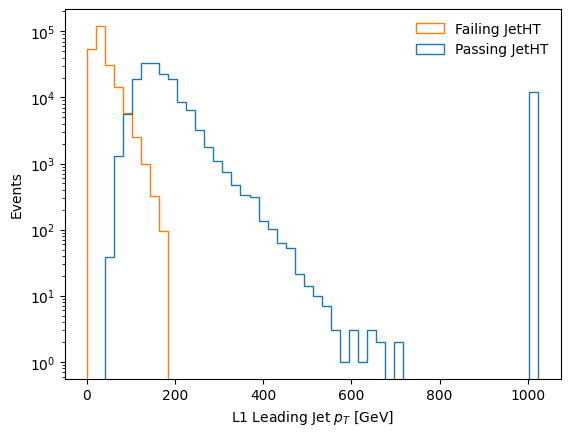

In [145]:
plt.hist([ak.flatten(jet_pt[trigger_bits][:,0:1]), #Every event that passed
         ak.flatten(jet_pt[~trigger_bits][:,0:1])], #Every event that failed
         bins=50,
         label=["Passing JetHT","Failing JetHT"], 
         histtype='step')
plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel(r"L1 Leading Jet $p_T$ [GeV]")
plt.ylabel("Events")

# Questions
**Can you make the same plot, but for each of the different L1 trigger bits that are part of the JetHT trigger?**

These results are a little wonky! We've determined that the pt files are sorted correctly (as in, by leading pt), so the remaining possible culprits include: prescaling, data cleanup/emulation, and/or missing certain seeds (the latter really only has to do with confirming all parts of Jet HT are accounted for)

In [10]:
# Remind ourselves of our dictionary
JetHT_bits = {
    "L1_HTT200er" : events["L1_HTT200er"].array(),
    "L1_HTT255er" : events["L1_HTT255er"].array(),
    "L1_HTT280er" : events["L1_HTT280er"].array(),
    "L1_HTT320er" : events["L1_HTT320er"].array(),
    "L1_HTT360er" : events["L1_HTT360er"].array(),
    "L1_HTT400er" : events["L1_HTT400er"].array(),
    "L1_HTT450er" : events["L1_HTT450er"].array(),
    "L1_ETT2000" : events["L1_ETT2000"].array(),
    "L1_SingleJet180" : events["L1_SingleJet180"].array(),
    "L1_SingleJet200" : events["L1_SingleJet200"].array()
}


In [ ]:
# Plotting them!
for key, value in JetHT_bits.items():
    plt.hist([ak.flatten(jet_pt[value][:,0:1]), #Every event that passed that specific bit
         ak.flatten(jet_pt[~value][:,0:1])], #Every other event that failed that bit
         bins=50, 
         label=[f"Passing {key}",f"Failing {key}"],
         histtype='step')
    plt.title(key)
    plt.legend(frameon=False)
    plt.yscale('log')
    plt.xlabel(r"L1 Leading Jet $p_T$ [GeV]")
    plt.ylabel("Events")
    plt.show()


### HT 400er

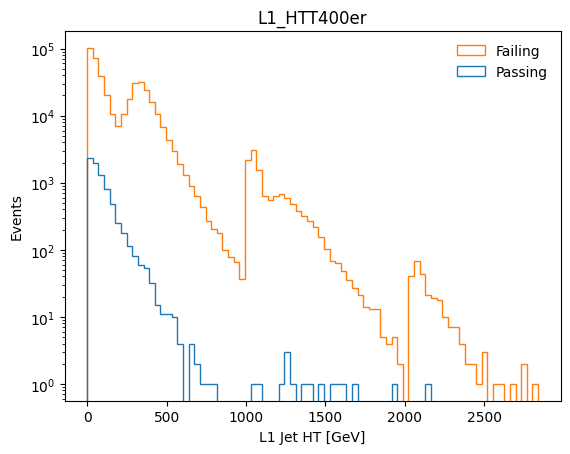

In [11]:
# Plotting a pass/fail histogram for HTT400er with HTs, not leading pTs
L1_HTT400er = events["L1_HTT400er"].array()
HT_values = np.sum(jet_pt, axis = 1)

plt.hist([HT_values[L1_HTT400er], 
         HT_values[~L1_HTT400er]], 
         bins=80, 
         label=["Passing", "Failing"],
         histtype='step')
plt.title("L1_HTT400er")
plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel("L1 Jet HT [GeV]")
plt.ylabel("Events")
plt.show()

In [217]:
np.max(jet_pt, axis = 1) >= 1000

<Array [False, False, False, ..., False, False, False] type='431555 * ?bool'>

## Jet HT Exploration

In [19]:
# Calculating Jet HT by hand
jet_bx_0 = events["L1Jet_bx"].array() == 0 # Bunch crossing mask

# All jet pts
jet_pt = (events['L1Jet_pt'].array())[jet_bx_0]
HT_values = []

for i in range(len(jet_pt)):
    jet_pt_np = ak.to_numpy(jet_pt[i]) 
    
    if len(jet_pt_np) == 0:
        HT_values.append(5000) # Any events without pT are put into the 5000 bin --> these will be masked out by JetHT anyways
    else:       
        if np.max(jet_pt_np) >= 1000: 
            HT_values.append(4000) # If there's a jet with a pT >= 1000, it will get stuck in the 4000 bin
        else: 
            HT = np.sum(jet_pt_np) # Everything else gets summed on an event-by-event basis
            HT_values.append(HT)

# Calculating it based on definition
# remove events w pt > 1000 (fact check!) --> if a jet > 1000ish, HT=2000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


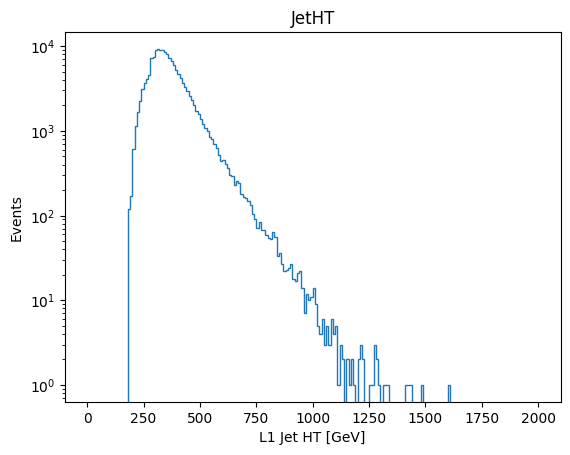

In [31]:
JetHT = events["DST_PFScouting_JetHT"].array()
HT_values = np.array(HT_values)
plt.hist(HT_values[JetHT], 
         bins=200, 
         range = [0,2000],
         histtype='step')
plt.title("JetHT")
plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel("L1 Jet HT [GeV]")
plt.ylabel("Events")
plt.show()

# There is a peak and a better cascading shape, but still doesn't look exactly right?

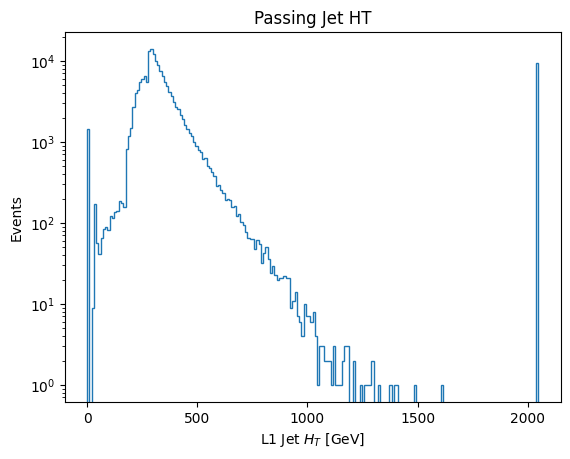

<Figure size 640x480 with 0 Axes>

In [30]:
"""
events_trig = events
l1_etsums = events_trig.L1EtSum
l1_ht = l1_etsums[(events_trig.L1EtSum.etSumType==1) & (events_trig.L1EtSum.bx==0)]
h_l1ht.fill(dataset=dataset, ht=ak.flatten(l1_ht.pt)) --> what's happening here? 
"""

l1_etsums = events["L1EtSum_pt"].array() # No idea if this is the right file, but based on context, yes?
l1ht_mask = (events["L1EtSum_etSumType"].array() == 1) & (events["L1EtSum_bx"].array() == 0)
l1_ht = l1_etsums[l1ht_mask]
l1_ht = ak.flatten(l1_ht)

jetHT = events["DST_PFScouting_JetHT"].array()

plt.hist(l1_ht[jetHT], 
         bins=200, 
         histtype='step')
plt.title("Passing Jet HT")
plt.yscale('log')
plt.xlabel(r"L1 Jet $H_T$ [GeV]")
plt.ylabel("Events")
plt.show()

plt.savefig("Passing Jet HT_etsums.png")

# Calculating it based on the axo_histos convention
# This looks just like the one in axo_histos?? I copied + pasted the code from notebook 4a, so I think there's just something weird with the 4a dataset?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


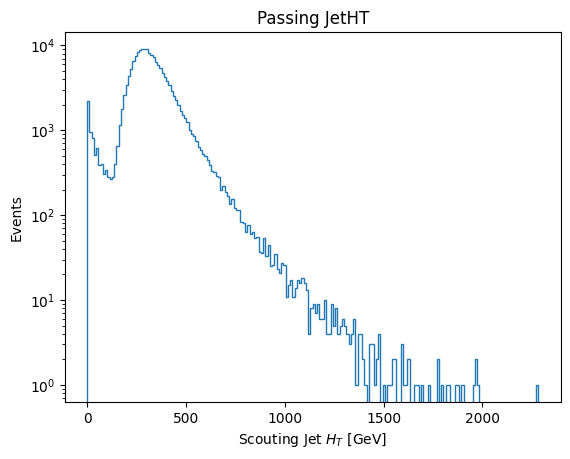

In [17]:
# What about just scouting?
# All jet pts
scouting_jet_pt = (events['ScoutingJet_pt'].array())

JetHT = events["DST_PFScouting_JetHT"].array()
HT_values = np.sum(scouting_jet_pt, axis = 1) 

plt.hist(HT_values[JetHT], 
         bins=200, 
         histtype='step')
plt.title("Passing JetHT")
plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel(r"Scouting Jet $H_T$ [GeV]")
plt.ylabel("Events")

plt.savefig("Passing Jet HT_scouting.jpg")
# For the most part, it has the same shape as what is in coffea. Kinda weird peak at 0 that we don't see as extremely in coffea, but so be it!

Text(0, 0.5, 'Events')

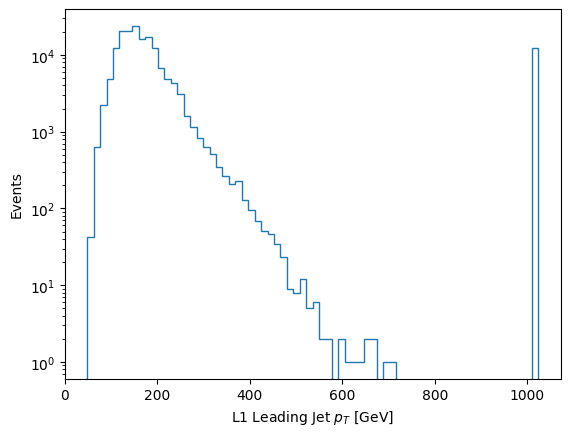

In [142]:
# To help diagnose the jet pT issue in 4a:
jet_bx_0 = events["L1Jet_bx"].array() == 0
jet_pt = (events['L1Jet_pt'].array())[jet_bx_0]

jetHT = events["DST_PFScouting_JetHT"].array()
jet_pt = jet_pt[jetHT]

plt.hist(ak.flatten(jet_pt[:,0:1]),
         bins = 70,
         histtype = "step")
plt.yscale('log')
plt.xlabel(r"L1 Leading Jet $p_T$ [GeV]")
plt.ylabel("Events")

## Dimuons

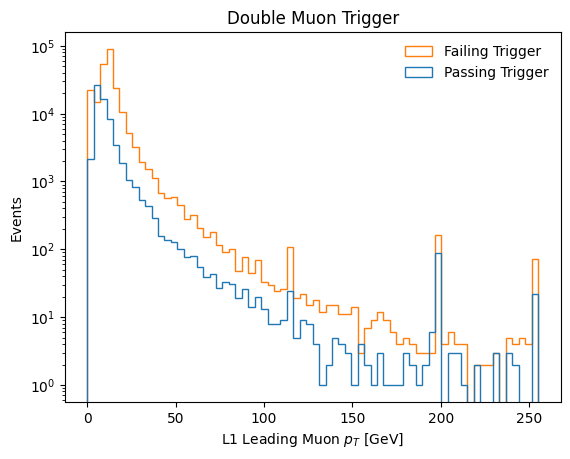

In [96]:
# What passed and failed the dimuon trigger as a whole? 
# We want muons now, not jets! And we should still add a mask!
mu_bx_0 = events["L1Mu_bx"].array() == 0
mu_pt = events["L1Mu_pt"].array()[mu_bx_0] # This is also already sorted, so it's fine

dimuon_trigger_bits = events["DST_PFScouting_DoubleMuon"].array()
dimuon_pass = mu_pt[dimuon_trigger_bits][:,0:1] 
dimuon_fail = mu_pt[~dimuon_trigger_bits][:,0:1]


plt.hist([ak.flatten(dimuon_pass), #Every event that passed
         ak.flatten(dimuon_fail)], #Every event that failed
         bins=70,
         label=["Passing Trigger","Failing Trigger"], 
         histtype='step')
plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel(r"L1 Leading Muon $p_T$ [GeV]")
plt.ylabel("Events")
plt.title("Double Muon Trigger")

#plt.savefig("Double Muon Trigger.jpg")

**What seeds does this event have?**
- L1_DoubleMu_12_5
- L1_DoubleMu_15_7
- L1_DoubleMu4p5er2p0_SQ_OS_Mass_Min7
- L1_DoubleMu4p5er2p0_SQ_OS_Mass_7to18
- L1_DoubleMu8_SQ
- L1_DoubleMu0er1p4_SQ_OS_dEta_Max1p2
- L1_DoubleMu4er2p0_SQ_OS_dR_Max1p6
- L1_DoubleMu5_SQ_OS_dR_Max1p6
- L1_DoubleMu3er2p0_SQ_OS_dR_Max1p6
- L1_DoubleMu0er1p5_SQ_OS_dEta_Max1p2
- L1_DoubleMu0er2p0_SQ_OS_dEta_Max1p6
- L1_DoubleMu0er1p4_OQ_OS_dEta_Max1p6
- L1_DoubleMu0er2p0_SQ_OS_dEta_Max1p5
- L1_DoubleMu0er1p4_SQ_OS_dR_Max1p4
- L1_DoubleMu0er1p5_SQ_OS_dR_Max1p4
- L1_DoubleMu4p5_SQ_OS_dR_Max1p2
- L1_DoubleMu4_SQ_OS_dR_Max1p2
- L1_DoubleMu0_Upt15_Upt7
- L1_DoubleMu0_Upt6_IP_Min1_Upt4
- L1_DoubleMu6_Upt6_SQ_er2p0
- L1_DoubleMu7_Upt7_SQ_er2p0
- L1_DoubleMu8_Upt8_SQ_er2p0
- L1_DoubleMu0er2p0_SQ_dEta_Max1p6
- L1_DoubleMu0er2p0_SQ_dEta_Max1p5

In [97]:
# Define another dictionary with all of these - actually most of them aren't here
Dimuon_bits = {
    "L1_DoubleMu_12_5" : events["L1_DoubleMu_12_5"].array(),
  #  "L1_DoubleMu_15_7" : events["L1_DoubleMu_15_7"].array() --> Prescaled to zero
}

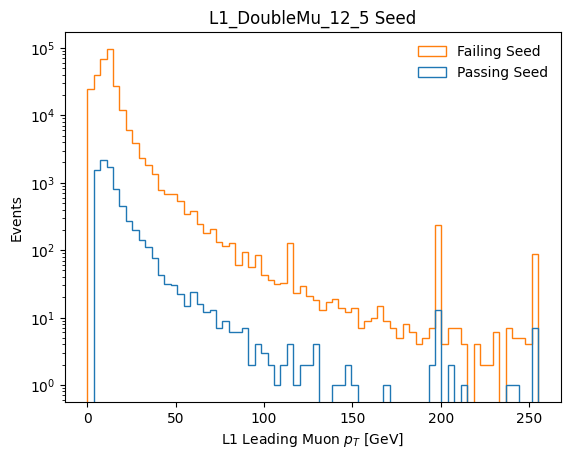

In [102]:
# Plot them!
for key, value in Dimuon_bits.items():
    plt.hist([ak.flatten(mu_pt[value][:,0:1]), #Every event that passed that specific bit
         ak.flatten(mu_pt[~value][:,0:1])], #Every other event that failed that bit
         bins=70, 
         label=["Passing Seed","Failing Seed"],
         histtype='step')
    plt.title(f"{key} Seed")
    plt.legend(frameon=False)
    plt.yscale('log')
    plt.xlabel(r"L1 Leading Muon $p_T$ [GeV]")
    plt.ylabel("Events")
    plt.show()

#plt.savefig("L1_DoubleMu_12_5 Seed.jpg")

In [4]:
# What percent passed the 12_5 seed?
double_mu_length = np.sum(events["DST_PFScouting_DoubleMuon"].array())
seed_length = np.sum(events["L1_DoubleMu_12_5"].array())

(seed_length / double_mu_length) * 100

12.373202541522685

## Single Muon

Text(0, 0.5, 'Events')

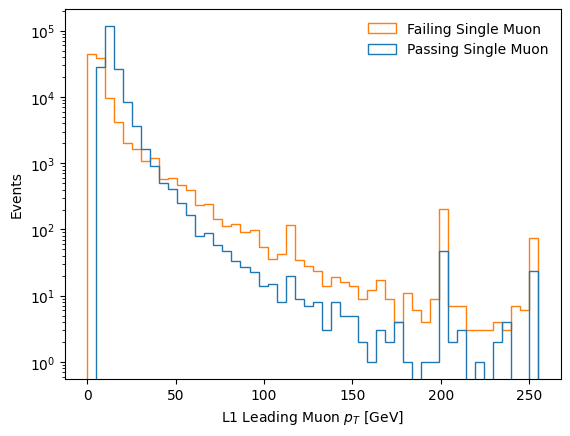

In [60]:
# Code is nearly identical to double muon
mu_bx_0 = events["L1Mu_bx"].array() == 0
mu_pt = events["L1Mu_pt"].array()[mu_bx_0] # This is also already sorted, so it's fine

muon_trigger_bits = events["DST_PFScouting_SingleMuon"].array()
muon_pass = mu_pt[muon_trigger_bits][:,0:1] 
muon_fail = mu_pt[~muon_trigger_bits][:,0:1]


plt.hist([ak.flatten(muon_pass), #Every event that passed
         ak.flatten(muon_fail)], #Every event that failed
         bins=50,
         label=["Passing Single Muon","Failing Single Muon"], 
         histtype='step')
plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel(r"L1 Leading Muon $p_T$ [GeV]")
plt.ylabel("Events")

**DST_PFScouting_SingleMuon seeds:**
- L1_SingleMu10_SQ14_BMTF
- L1_SingleMu11_SQ14_BMTF

Turns out that none of these are in the file either, so we stop here!

## AXO_Nominal

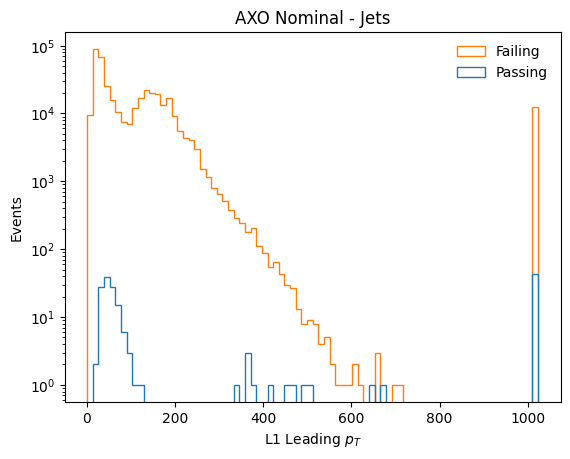

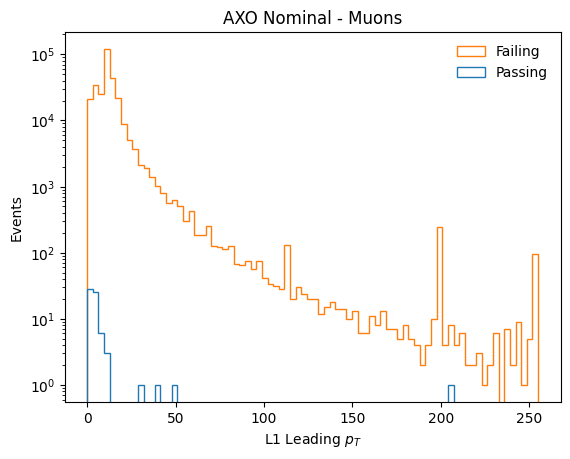

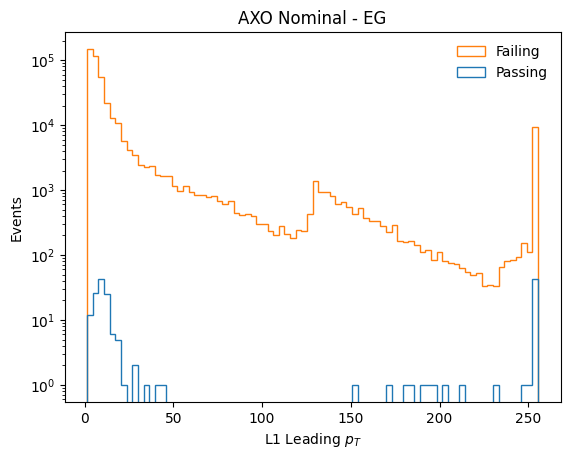

In [105]:
# AXO triggers take in all objects, because who knows what it's collecting!
jet_bx_0 = events["L1Jet_bx"].array() == 0
jet_pt = events["L1Jet_pt"].array()[jet_bx_0] 
mu_bx_0 = events["L1Mu_bx"].array() == 0
mu_pt = events["L1Mu_pt"].array()[mu_bx_0]
eg_bx_0 = events["L1EG_bx"].array() == 0
eg_pt = events["L1EG_pt"].array()[eg_bx_0]
axonom_trigger_bits = events["DST_PFScouting_AXONominal"].array()

# Jets:
axonom_jet = [ak.flatten(jet_pt[axonom_trigger_bits][:,0:1]),
               ak.flatten(jet_pt[~axonom_trigger_bits][:,0:1])]
plt.hist(axonom_jet, 
         label = ["Passing", "Failing"],
         bins=80,
        histtype = "step")
plt.xlabel(r"L1 Leading $p_T$")
plt.yscale("log")
plt.ylabel("Events")
plt.title("AXO Nominal - Jets")
plt.legend(frameon=False)
plt.show()

# Muons:
axonom_muons = [ak.flatten(mu_pt[axonom_trigger_bits][:,0:1]),
               ak.flatten(mu_pt[~axonom_trigger_bits][:,0:1])]
plt.hist(axonom_muons, 
         label = ["Passing", "Failing"],
         bins=80,
        histtype = "step")
plt.xlabel(r"L1 Leading $p_T$")
plt.yscale("log")
plt.ylabel("Events")
plt.title("AXO Nominal - Muons")
plt.legend(frameon=False)
plt.show()

#EG:
axonom_eg = [ak.flatten(eg_pt[axonom_trigger_bits][:,0:1]),
               ak.flatten(eg_pt[~axonom_trigger_bits][:,0:1])]
plt.hist(axonom_eg, 
         label = ["Passing", "Failing"],
         bins=80,
        histtype = "step")
plt.xlabel(r"L1 Leading $p_T$")
plt.yscale("log")
plt.ylabel("Events")
plt.title("AXO Nominal - EG")
plt.legend(frameon=False)
plt.show()

**What seeds does AXO_Nominal have?**
- L1_AXO_Nominal

Since it only has one seed, DST_PFScouting_AXONominal should = L1_AXO_Nominal 

## AXO_Tight
Similar case to AXO_Nominal, where DST_PFScouting_AXOTight = L1_AXO_Tight

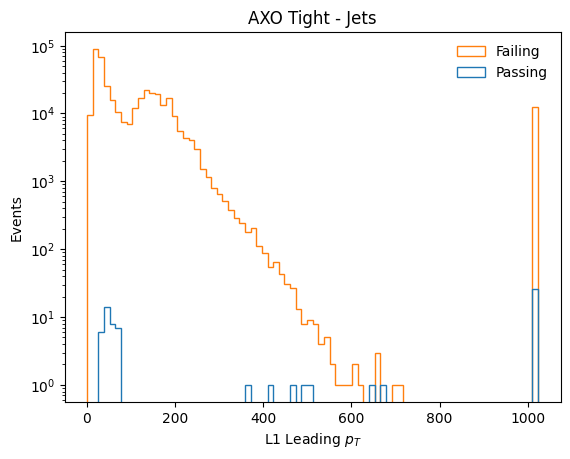

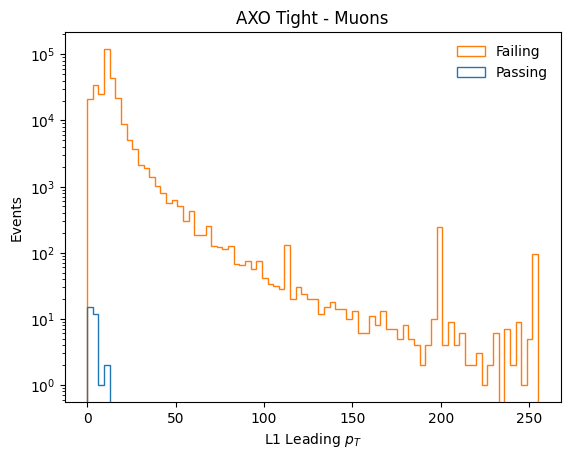

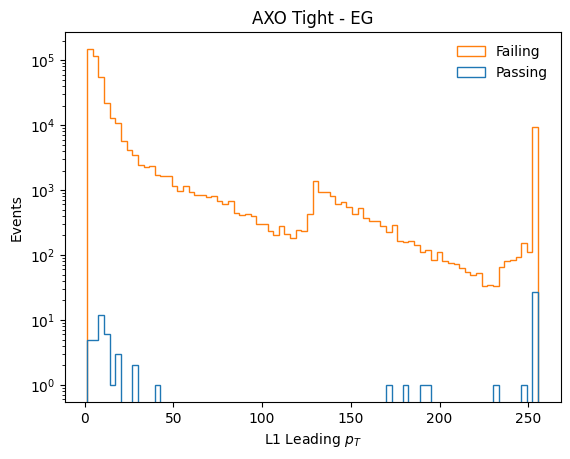

In [46]:
jet_bx_0 = events["L1Jet_bx"].array() == 0
jet_pt = events["L1Jet_pt"].array()[jet_bx_0] 
mu_bx_0 = events["L1Mu_bx"].array() == 0
mu_pt = events["L1Mu_pt"].array()[mu_bx_0]
eg_bx_0 = events["L1EG_bx"].array() == 0
eg_pt = events["L1EG_pt"].array()[eg_bx_0]
axotight_trigger_bits = events["DST_PFScouting_AXOTight"].array()

# Jets:
axotight_jet = [ak.flatten(jet_pt[axotight_trigger_bits][:,0:1]),
               ak.flatten(jet_pt[~axotight_trigger_bits][:,0:1])]
plt.hist(axotight_jet, 
         label = ["Passing", "Failing"],
         bins=80,
        histtype = "step")
plt.xlabel(r"L1 Leading $p_T$")
plt.yscale("log")
plt.ylabel("Events")
plt.title("AXO Tight - Jets")
plt.legend(frameon=False)
plt.show()

# Muons:
axotight_muons = [ak.flatten(mu_pt[axotight_trigger_bits][:,0:1]),
               ak.flatten(mu_pt[~axotight_trigger_bits][:,0:1])]
plt.hist(axotight_muons, 
         label = ["Passing", "Failing"],
         bins=80,
        histtype = "step")
plt.xlabel(r"L1 Leading $p_T$")
plt.yscale("log")
plt.ylabel("Events")
plt.title("AXO Tight - Muons")
plt.legend(frameon=False)
plt.show()

#EG:
axotight_eg = [ak.flatten(eg_pt[axotight_trigger_bits][:,0:1]),
               ak.flatten(eg_pt[~axotight_trigger_bits][:,0:1])]
plt.hist(axotight_eg, 
         label = ["Passing", "Failing"],
         bins=80,
        histtype = "step")
plt.xlabel(r"L1 Leading $p_T$")
plt.yscale("log")
plt.ylabel("Events")
plt.title("AXO Tight - EG")
plt.legend(frameon=False)
plt.show()

In [30]:
# AXO Nominal vs. Tight:
total_number_of_events = len(events["event"].array())
storage_dst = []
for key, value in events.items():
    if "_AXO" in key:
         passing_axo = np.sum(value)
         percent_axo = (passing_axo / total_number_of_events) * 100
         print(f"{key}: {percent_axo}%")

# AXO is in fact larger! Woohoo!

DST_PFScouting_AXONominal: 0.04124619109962809%
DST_PFScouting_AXOTight: 0.0157569718807568%


## Looking at different passing percentages

In [36]:
# Begin with DST
total_number_of_events = len(events["event"].array())
storage_dst = []
for key, value in events.items():
    if "DST_" in key:
        passing_dst = np.sum(value)
        percent_dst = (passing_dst / total_number_of_events) * 100
        storage_dst.append(percent_dst)
        print(f"{key}: {percent_dst}%")

DST_PFScouting_DoubleMuon: 14.551331811704186%
DST_PFScouting_DoubleEG: 2.8123877605403713%
DST_PFScouting_JetHT: 39.076826823927426%
DST_PFScouting_DatasetMuon: 2.446038164312776%
DST_PFScouting_AXONominal: 0.04124619109962809%
DST_PFScouting_AXOTight: 0.0157569718807568%
DST_PFScouting_SingleMuon: 43.93090104389939%


In [ ]:
# Next L1 --> will be filtering
total_number_of_events = len(events["event"].array())
storage_l1 = []
for key, value in events.items():
    if "L1_" in key: # Ignore the HLTs at the end
        passing_l1 = np.sum(value)
        percent_l1 = (passing_l1 / total_number_of_events) * 100
        storage_l1.append(percent_l1)
        if percent_l1 > 1: # Arbitrary cut
            print(f"{key}: {percent_l1}%")

In [40]:
# What L1 bit passes the most events?
np.max(storage_l1)
# This is L1_FirstBunchInTrain!

44.08151915746544

In [42]:
# Finally HLT --> will be filtering
total_number_of_events = len(events["event"].array())
storage_hlt = []
for key, value in events.items():
    if "HLT_" in key: # Ignore the HLTs at the end
        passing_hlt = np.sum(value)
        percent_hlt = (passing_hlt / total_number_of_events) * 100
        storage_hlt.append(percent_hlt)
        if percent_hlt > 1: # Arbitrary cut
            print(f"{key}: {percent_hlt}%")

HLT_DoubleMu4_3_LowMass: 3.7397318997578526%
HLT_Mu0_L1DoubleMu: 9.333688637601233%
HLT_Mu9_Barrel_L1HP10_IP6: 7.838398350152357%
HLT_Mu10_Barrel_L1HP11_IP6: 5.622458319333573%
HLT_IsoMu24: 1.104841793050712%
HLT_L2Mu23NoVtx_2Cha: 2.510224652709388%
HLT_L2Mu23NoVtx_2Cha_CosmicSeed: 2.276418996419923%
HLT_L2Mu10NoVtx_2Cha: 8.393368168599599%
HLT_L2Mu10NoVtx_2Cha_VetoL3Mu0DxyMax1cm: 1.1521127086929823%
HLT_L3Mu10NoVtx: 7.631240513955348%
HLT_L3Mu10NoVtx_DxyMin0p01cm: 3.277450151197414%
HLT_L2Mu10NoVtx_2Cha_CosmicSeed: 8.056910474910497%
HLT_L2Mu10NoVtx_2Cha_CosmicSeed_VetoL3Mu0DxyMax1cm: 1.0218859705020218%
HLT_VBF_DiPFJet125_45_Mjj1050: 1.4392140051673599%


In [46]:
# What HLT bit passes the most events?
np.max(storage_hlt)
# This is HLT_Mu0_L1DoubleMu!

9.333688637601233

## AXO Nominal Trigger Efficiency
This is a first run and then if it's successful, I can make it look better in coffea? Also, I tried to do it with both the L1_DoubleMu_12_5 seed, as well as the DST_PFScouting_DoubleMuon trigger, but stats were pretty bad for both of them (IE, there were 3 passing events for both - which is sorta weird, because why doesn't the trigger have more passing events than the seed?). Anyways, the stuff below is with the Jet HT trigger, because that seemed to have the most passing events.

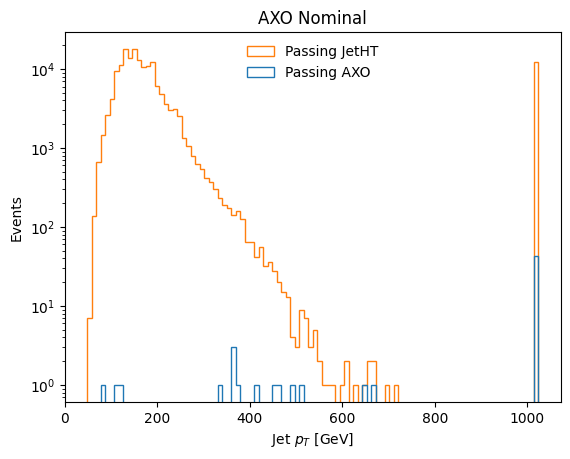

In [274]:
"""
# What passed?
dimuon_seed = events["DST_PFScouting_DoubleMuon"].array() 
#dimuon_seed = events["L1_DoubleMu_12_5"].array()
mu_bx_0 = events["L1Mu_bx"].array() == 0
mu_pt = events["L1Mu_pt"].array()[mu_bx_0]

# What passed AXO?
axonom_trigger_bits = events["DST_PFScouting_AXONominal"].array()
passing = dimuon_seed & axonom_trigger_bits
passing_mu = mu_pt[passing]
passing_mu = ak.flatten(passing_mu[:,0:1])

# What failed AXO?
failing = dimuon_seed & ~axonom_trigger_bits
failing_mu = mu_pt[failing]
failing_mu = ak.flatten(failing_mu[:,0:1])

# Plot these
plt.hist([passing_mu, failing_mu],
         bins = 100, 
         label = ["Passing", "Failing"],
         histtype = "step")
plt.yscale("log")
plt.ylabel("Events")
plt.xlabel(r"Muon $p_T$ [GeV]")
plt.title("AXO Nominal")
plt.legend(frameon = False)
"""

# What passed?
jetHT = events["DST_PFScouting_JetHT"].array()
jet_bx_0 = events["L1Jet_bx"].array() == 0
jet_pt = events["L1Jet_pt"].array()[jet_bx_0]

# What passed AXO?
axonom_trigger_bits = events["DST_PFScouting_AXONominal"].array()
passing = jetHT & axonom_trigger_bits # Right?
passing_jet = jet_pt[passing]
passing_jet = ak.flatten(passing_jet[:,0:1])

# What failed AXO?
#failing = jetHT & ~axonom_trigger_bits --> Keeps what passed jetHT, but not what failed AXO_Nominal
failing_jet = jet_pt[jetHT] # We just want everything that passed JetHT, don't have to filter out failed AXO
failing_jet = ak.flatten(failing_jet[:,0:1])

# Use np.histogram to organize
passing = np.histogram(passing_jet, bins = 100)
failing = np.histogram(failing_jet, bins = 100)

# Visually demonstrate what passed and what didn't
plt.hist([passing_jet, failing_jet],
         bins = 100, 
         label = ["Passing AXO", "Passing JetHT"],
         histtype = "step")
plt.yscale("log")
plt.ylabel("Events")
plt.xlabel(r"Jet $p_T$ [GeV]")
plt.title("AXO Nominal")
plt.legend(frameon = False)

Text(0, 0.5, 'Efficiency')

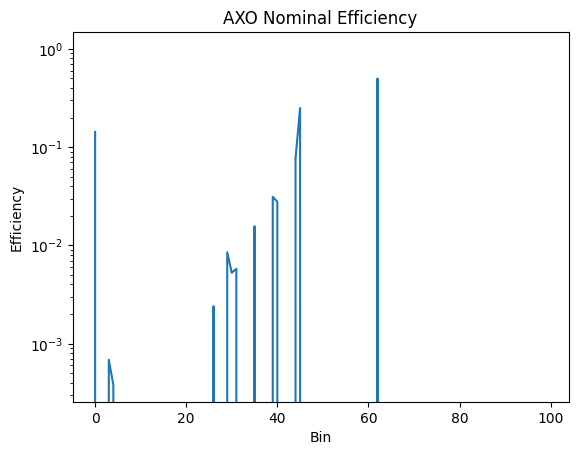

In [287]:
# Plotting efficiency
efficiency = passing[0] / failing[0]

plt.plot(efficiency)
plt.yscale("log")
plt.title("AXO Nominal Efficiency")
plt.xlabel("Bin")
plt.ylabel("Efficiency")

# Each element represents (Number of events passing both JetHT and AXO Nominal) / (Number of events passing JetHT) for that particular jet pT bin.

## Double Jet Seed on the JetHT plot!

In [169]:
# All on one plot, include double jets
passed_jetHT = events["DST_PFScouting_JetHT"].array()
passed_255 = events["L1_HTT255er"].array()
passed_360 = events["L1_HTT360er"].array()
passed_400 = events["L1_HTT400er"].array()
passed_sj180 = events["L1_SingleJet180"].array()
passed_sj200 = events["L1_SingleJet200"].array()

double_jet = passed_jetHT & ~(passed_255) & ~passed_360 & ~passed_400 & ~passed_sj180 & ~passed_sj200

In [29]:
counter = 0
for i in range(len(double_jet)):
    if double_jet[i] != passed_jetHT[i]:
        counter += 1

print(counter)

311


This is saying that only 311 events are unique to the other 5 seeds. This is a little lower than I would expect, but also the double jets do account for the majority of passing events, and the prescales make the numbers a little wonky. This does mean that when I graph it, JetHT and the double jets are practically indistinguishable. Maybe that changes when I calculate invariant mass but how do I even do that 😍

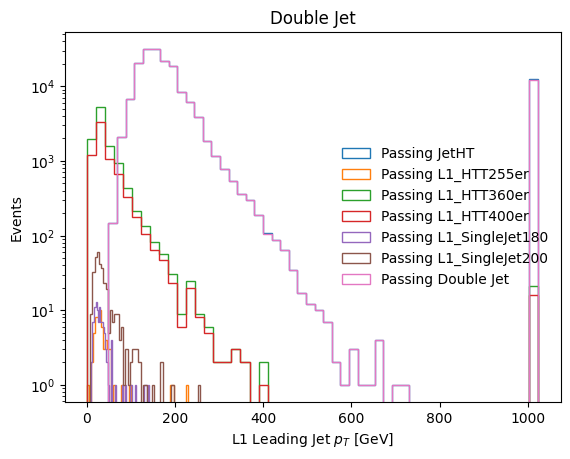

In [89]:
jet_bx_0 = events["L1Jet_bx"].array() == 0
jet_pt = events["L1Jet_pt"].array()[jet_bx_0]

JetHT_bits = {
    "JetHT" : events["DST_PFScouting_JetHT"].array(),
 #   "L1_HTT200er" : events["L1_HTT200er"].array(),
    "L1_HTT255er" : events["L1_HTT255er"].array(),
 #   "L1_HTT280er" : events["L1_HTT280er"].array(),
 #   "L1_HTT320er" : events["L1_HTT320er"].array(),
    "L1_HTT360er" : events["L1_HTT360er"].array(),
    "L1_HTT400er" : events["L1_HTT400er"].array(),
 #   "L1_HTT450er" : events["L1_HTT450er"].array(),
 #   "L1_ETT2000" : events["L1_ETT2000"].array(),
    "L1_SingleJet180" : events["L1_SingleJet180"].array(),
    "L1_SingleJet200" : events["L1_SingleJet200"].array(),
    "Double Jet" : double_jet
}

for key, value in JetHT_bits.items():
    plt.hist(ak.flatten(jet_pt[value][:,0:1]), #Every event that passed that specific bit
         bins=50, 
         label=(f"Passing {key}"),
         histtype='step')
    plt.title(key)
    plt.legend(frameon=False)
    plt.yscale('log')
    plt.xlabel(r"L1 Leading Jet $p_T$ [GeV]")
    plt.ylabel("Events")

plt.show()

In [ ]:
# Try to calculate invariant mass?
from pylorentz import Momentum4

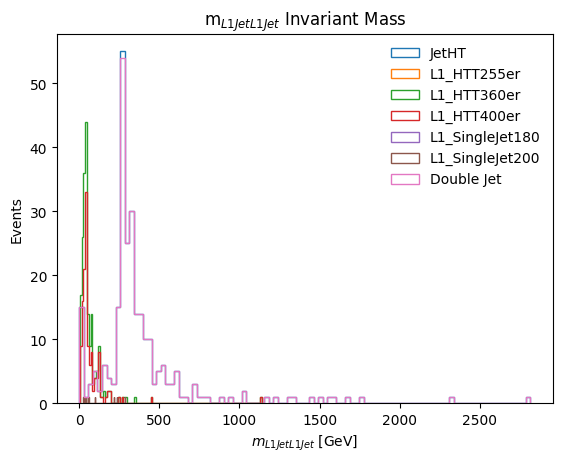

In [159]:
# Calculating it by hand --> same as Momentum4 method when m = 0, but idk if that's how it works
for key, value in JetHT_bits.items():
    jet_pt  = events["L1Jet_pt"].array()
    jet_eta = events["L1Jet_eta"].array()
    jet_phi = events["L1Jet_phi"].array()
    at_least_two_jets = events["nL1Jet"].array() == 2

    mask = at_least_two_jets & value
    jet_pt = jet_pt[mask]
    jet_eta = jet_eta[mask]
    jet_phi = jet_phi[mask]

    eta1, phi1, pt1 = jet_eta[:,0], jet_phi[:,0], jet_pt[:,0]
    eta2, phi2, pt2 = jet_eta[:,1], jet_phi[:,1], jet_pt[:,1]
    
    dijet = np.sqrt(2*pt1*pt2*(np.cosh(eta1-eta2)-np.cos(phi1-phi2)))

    plt.hist(dijet, 
             bins=100,
             label = key,
             histtype='step')
    plt.xlabel(r"$m_{L1JetL1Jet}$ [GeV]")
    plt.ylabel("Events")
    plt.legend(frameon=False)
    plt.title(r"m$_{L1JetL1Jet}$ Invariant Mass")

plt.show()

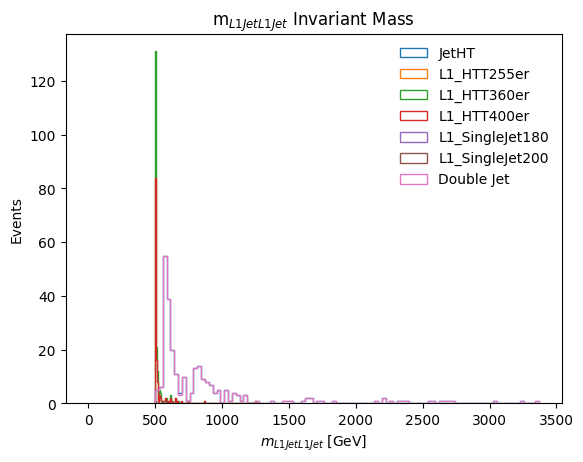

In [164]:
for key, value in JetHT_bits.items():
    jet_pt  = events["L1Jet_pt"].array()
    jet_eta = events["L1Jet_eta"].array()
    jet_phi = events["L1Jet_phi"].array()
    at_least_two_jets = events["nL1Jet"].array() == 2

    mask = at_least_two_jets & value
    jet_pt = jet_pt[mask]
    jet_eta = jet_eta[mask]
    jet_phi = jet_phi[mask]
    
    jet1= Momentum4.m_eta_phi_pt(250, jet_eta[:,0], jet_phi[:,0], jet_pt[:,0]) # What is the mass here? Also, I thought that m wasn't used in the calculation? Is it different for jets?
    jet2= Momentum4.m_eta_phi_pt(250, jet_eta[:,1], jet_phi[:,1], jet_pt[:,1])
    
    dijet = jet1 + jet2

    plt.hist(dijet.m, 
             bins=100,
             label = key,
             histtype='step')
    plt.xlabel(r"$m_{L1JetL1Jet}$ [GeV]")
    plt.ylabel("Events")
    plt.legend(frameon=False)
    plt.title(r"m$_{L1JetL1Jet}$ Invariant Mass")

plt.show()